Apply clustering techniques on “Bank_dataset” data using dbscan with epsilon= 1.2 , Min_points=3 , 
*Apply the required preprocessing techniques.

And apply Hierarichal on the same data, 
*Apply the required preprocessing techniques.

In [46]:
import numpy as np
import pandas as pd

In [112]:
#Display bank_dataset and assign id column as head
Bank = pd.read_csv("bank_dataset.csv", index_col = "id")
datasetshape = np.shape(Bank)
print(Bank.head(), '\n')
print(datasetshape)

         age     sex      region   income married  children  car save_act  \
id                                                                          
ID12101   48  FEMALE  INNER_CITY  17546.0      NO         1   NO       NO   
ID12102   40    MALE        TOWN  30085.1     YES         3  YES       NO   
ID12103   51  FEMALE  INNER_CITY  16575.4     YES         0  YES      YES   
ID12104   23  FEMALE        TOWN  20375.4     YES         3   NO       NO   
ID12105   57  FEMALE       RURAL  50576.3     YES         0   NO      YES   

        current_act  
id                   
ID12101          NO  
ID12102         YES  
ID12103         YES  
ID12104         YES  
ID12105          NO   

(600, 9)


# Preprocessing

In [116]:
#Preprocessing
#identify missing data and fill it in
NFeatures = Bank.select_dtypes(exclude = ['object']).columns.tolist()
NumericalFeatures = Bank[NFeatures].columns.tolist()
print("Numerical features:", NFeatures)
CFeatures = Bank.select_dtypes(include = ['object']).columns.tolist()
CategoricalFeatures = Bank[CFeatures].columns.tolist()
print("Categorical features:", CFeatures)

Numerical features: ['age', 'income', 'children']
Categorical features: ['sex', 'region', 'married', 'car', 'save_act', 'current_act']


In [117]:
#Compare accuracy between missing data impution and baseline data
#) Mean for numerical features/ Most Freqent for categorical features  
from sklearn.impute import SimpleImputer
MeanFeatures = Bank[NFeatures]
imp_mean = SimpleImputer(missing_values = np.nan , strategy = 'mean')
imp_mean.fit(MeanFeatures)
MeanFeatures = imp_mean.transform(MeanFeatures)
#print(MeanFeatures)
FrequentFeatures = Bank[CFeatures]
imp_freq = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')
imp_freq.fit(FrequentFeatures)
FrequentFeatures = imp_freq.transform(FrequentFeatures)

In [118]:
#Discretisation and Normalisation using basic transforms, the highest mean accuracy is used on final dataset
#Check input age,sex,region, income, married, children, car, save_act
#Check output current_act
#) MEAN/FREQUENT IMPUTED DATA
from sklearn.preprocessing import LabelEncoder
#Scalers for Numerical data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#Discretisers for Numerical data
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
#print(Bank)

In [119]:
output = Bank['current_act']
output = LabelEncoder().fit_transform(output.astype('str'))
print(output)
#Use default values for all transforms
#Transforms used here are MinMaxScaler (since not guaranteed to be gaussian)
#and PCA
#We don't need to fit and encode all variables so KMEANS isn't used
pca = PCA()
print(pca)
c = pca.fit(MeanFeatures)
MeanFeatures = pca.transform(MeanFeatures)
print(MeanFeatures)
scaler = MinMaxScaler()
NormalMeanFeatures = scaler.fit_transform(MeanFeatures)
print("Number of features covered:", scaler.n_features_in_)
Bank[NFeatures] = NormalMeanFeatures    ###After PCA

[0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0
 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1
 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 0 1 0 

In [120]:
print(Bank.head())

              age     sex      region    income married  children  car  \
id                                                                       
ID12101  0.362289  FEMALE  INNER_CITY  0.215635      NO  0.677218   NO   
ID12102  0.978184    MALE        TOWN  0.431395     YES  0.249354  YES   
ID12103  0.048089  FEMALE  INNER_CITY  0.198934     YES  0.765246  YES   
ID12104  0.985467  FEMALE        TOWN  0.264320     YES  0.045823   NO   
ID12105  0.010721  FEMALE       RURAL  0.783987     YES  0.243678   NO   

        save_act current_act  
id                            
ID12101       NO          NO  
ID12102       NO         YES  
ID12103      YES         YES  
ID12104       NO         YES  
ID12105      YES          NO  


# DBSCAN (non-discretised, non-normalised data)

### When normal, discretised data was used, dbscan printed all zeros 

In [178]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

In [179]:
#Display bank_dataset and assign id column as head
data = pd.read_csv("bank_dataset.csv")
datasetshape = np.shape(Bank)
print(Bank.head(), '\n')
print(datasetshape)

        id  age  sex  region   income  married  children  car  save_act  \
0  ID12101   48    0       0  17546.0        0         1    0         0   
1  ID12102   40    1       3  30085.1        1         3    1         0   
2  ID12103   51    0       0  16575.4        1         0    1         1   
3  ID12104   23    0       3  20375.4        1         3    0         0   
4  ID12105   57    0       1  50576.3        1         0    0         1   

   current_act  
0            0  
1            1  
2            1  
3            1  
4            0   

(600, 10)


In [180]:
#Encoding for all categorical data
#output = []
#Bank_C_List = Bank[CFeatures].columns.tolist()
#for i in range (len(Bank_C_List)):
    #output.append(LabelEncoder().fit_transform(Bank_C_List[i]))

encoder = LabelEncoder()
#encoder.fit(Bank[CFeatures])
#Bank[CFeatures] = encoder.transform(Bank[CFeatures])
Bank['sex'] = LabelEncoder().fit_transform(Bank['sex']) 
Bank['region'] = LabelEncoder().fit_transform(Bank['region']) 
Bank['married'] = LabelEncoder().fit_transform(Bank['married']) 
Bank['car'] = LabelEncoder().fit_transform(Bank['car']) 
Bank['save_act'] = LabelEncoder().fit_transform(Bank['save_act']) 
Bank['current_act'] = LabelEncoder().fit_transform(Bank['current_act'])
print(Bank.head())
#clustering using DBSCAN, epsilon = 1.2, min samples = 3
#all columns except first
dbscan = DBSCAN(eps = 1.2, min_samples = 3).fit(Bank.iloc[:,1:])
print(dbscan.labels_)

        id  age  sex  region   income  married  children  car  save_act  \
0  ID12101   48    0       0  17546.0        0         1    0         0   
1  ID12102   40    1       3  30085.1        1         3    1         0   
2  ID12103   51    0       0  16575.4        1         0    1         1   
3  ID12104   23    0       3  20375.4        1         3    0         0   
4  ID12105   57    0       1  50576.3        1         0    0         1   

   current_act  
0            0  
1            1  
2            1  
3            1  
4            0  
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1

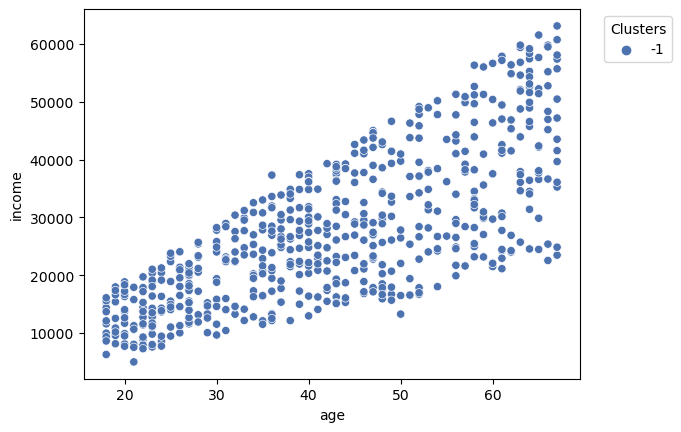

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = Bank, x = "age", y = "income", hue = dbscan.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.2, 1), title = 'Clusters')
plt.show()

# AGGLOMERATIVE HIERARICHAL CLUSTERING (non-discretised, non-normalised data)

In [182]:
from sklearn.cluster import AgglomerativeClustering

In [183]:
agglomerative = AgglomerativeClustering().fit(Bank.iloc[:, 1:])
print(Bank.head())
print(agglomerative.labels_)

        id  age  sex  region   income  married  children  car  save_act  \
0  ID12101   48    0       0  17546.0        0         1    0         0   
1  ID12102   40    1       3  30085.1        1         3    1         0   
2  ID12103   51    0       0  16575.4        1         0    1         1   
3  ID12104   23    0       3  20375.4        1         3    0         0   
4  ID12105   57    0       1  50576.3        1         0    0         1   

   current_act  
0            0  
1            1  
2            1  
3            1  
4            0  
[1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1

In [184]:
#plot hierarichal clustering
from collections import Counter
print(Counter(agglomerative.labels_))

Counter({1: 374, 0: 226})


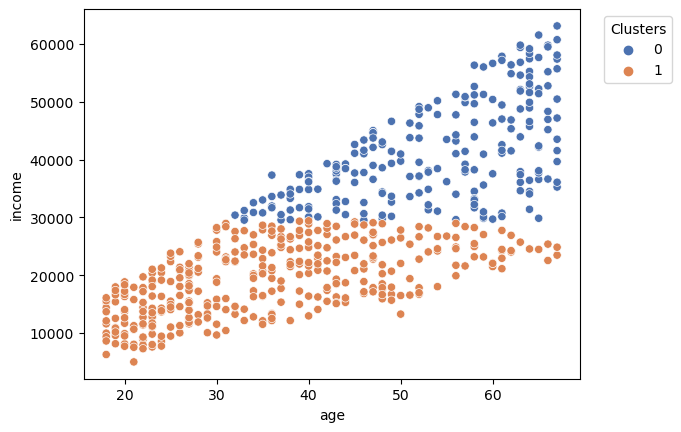

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = Bank, x = "age", y = "income", hue = agglomerative.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.2, 1), title = 'Clusters')
plt.show()